In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
sns.set(style='darkgrid')

In [3]:
df = pd.read_csv('bank-full.csv', sep = ';')

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
row = df.shape[0]
column = df.shape[1]

print("There are {} rows and {} columns in the dataset" .format(row, column))

There are 45211 rows and 17 columns in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.columns[df.isnull().any()].tolist() 

[]

In [9]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
df = df.drop(columns = ['duration'])

In [11]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


## Printing the unique values of the categorical columns

In [12]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in cols:
    print('There are {} unique values in column, "{}"'.format(df[col].nunique(), col))
    print('Unique values of column, "{}": {}'.format(col, df[col].unique()))


There are 12 unique values in column, "job"
Unique values of column, "job": ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
There are 3 unique values in column, "marital"
Unique values of column, "marital": ['married' 'single' 'divorced']
There are 4 unique values in column, "education"
Unique values of column, "education": ['tertiary' 'secondary' 'unknown' 'primary']
There are 2 unique values in column, "default"
Unique values of column, "default": ['no' 'yes']
There are 2 unique values in column, "housing"
Unique values of column, "housing": ['yes' 'no']
There are 2 unique values in column, "loan"
Unique values of column, "loan": ['no' 'yes']
There are 3 unique values in column, "contact"
Unique values of column, "contact": ['unknown' 'cellular' 'telephone']
There are 12 unique values in column, "month"
Unique values of column, "month": ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan

Text(0, 0.5, 'Job Title')

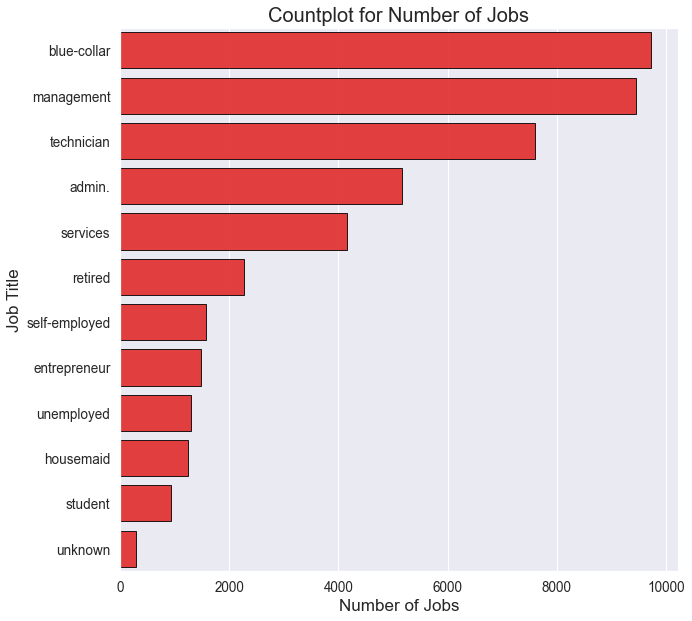

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.countplot(y = 'job', data = df, 
                   order = df['job'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Number of Jobs', size = 20)
ax.set_xlabel('Number of Jobs', size = 17)
ax.set_ylabel('Job Title', size = 17)

Text(0, 0.5, 'Marital Status')

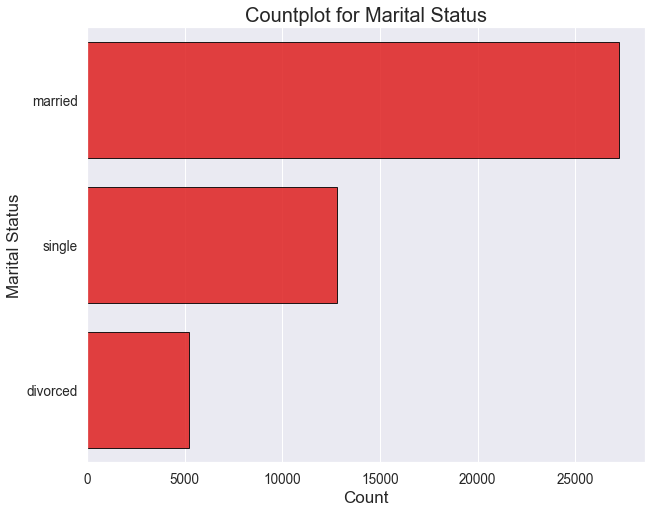

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.countplot(y = 'marital', data = df, 
                   order = df['marital'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Marital Status', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Marital Status', size = 17)

Text(0, 0.5, 'Education Level')

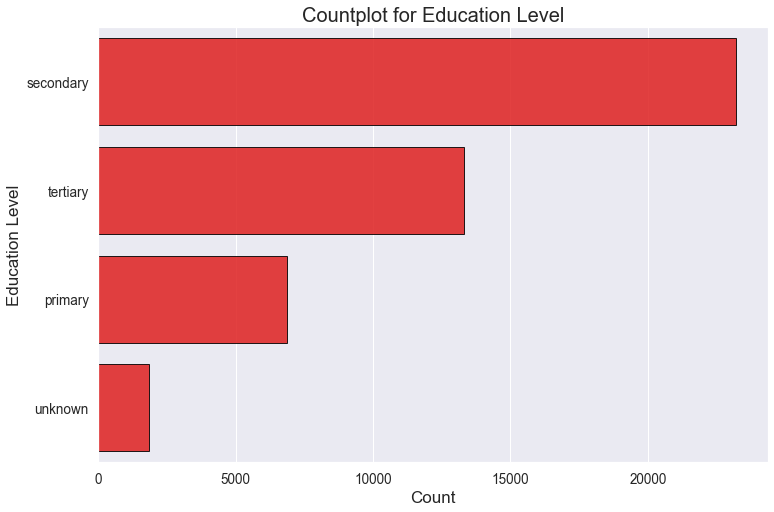

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

ax = sns.countplot(y = 'education', data = df, 
                   order = df['education'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Education Level', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Education Level', size = 17)

Text(0, 0.5, 'Default')

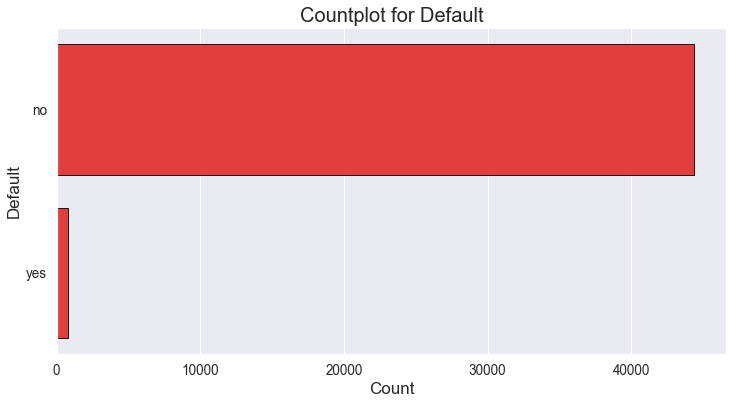

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'default', data = df, 
                   order = df['default'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Default', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Default', size = 17)

Text(0, 0.5, 'Housing Loan Status')

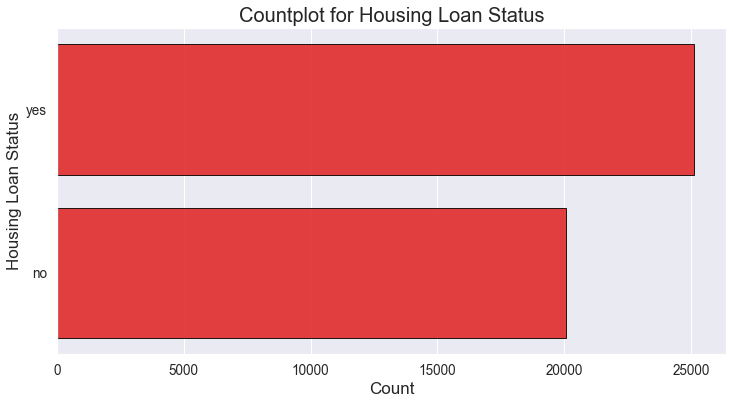

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'housing', data = df, 
                   order = df['housing'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Housing Loan Status', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Housing Loan Status', size = 17)

Text(0, 0.5, 'Loan Status')

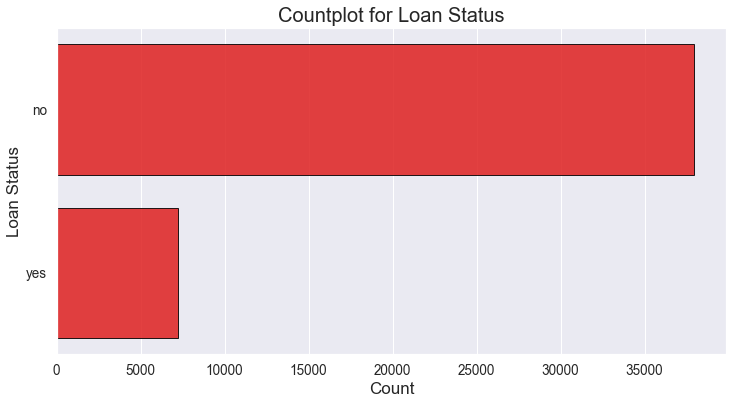

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'loan', data = df, 
                   order = df['loan'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Loan Status', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Loan Status', size = 17)

Text(0, 0.5, 'Mode of Contact')

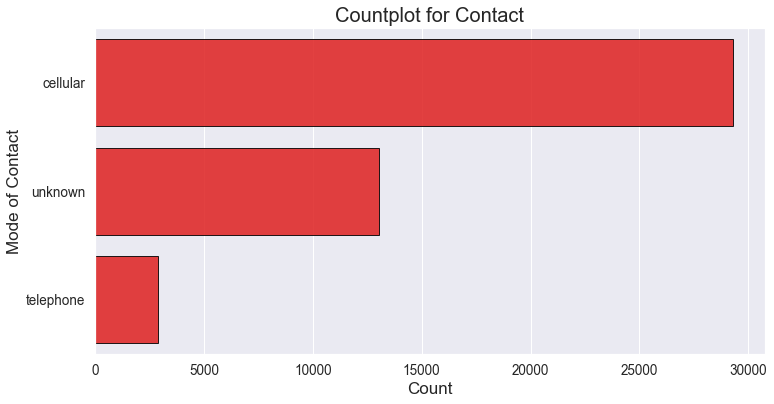

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'contact', data = df, 
                   order = df['contact'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Contact', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Mode of Contact', size = 17)

Text(0, 0.5, 'Month')

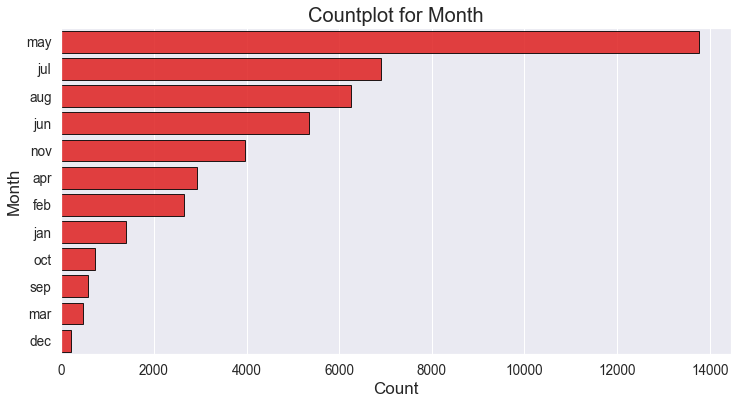

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'month', data = df, 
                   order = df['month'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for Month', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Month', size = 17)

Text(0, 0.5, 'Previous Outcome')

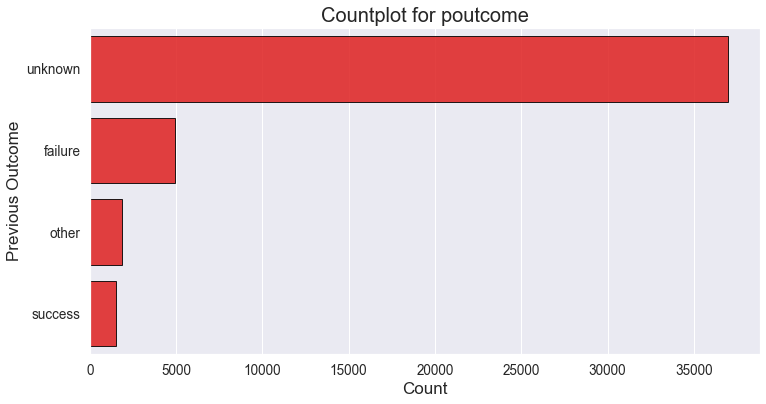

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'poutcome', data = df, 
                   order = df['poutcome'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for poutcome', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('Previous Outcome', size = 17)

Text(0, 0.5, 'y')

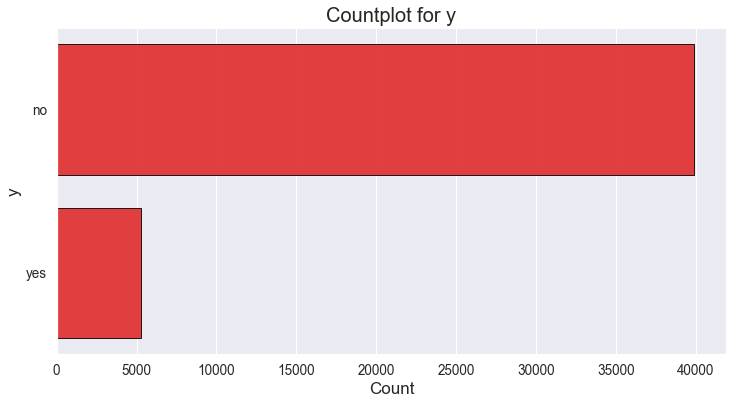

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.countplot(y = 'y', data = df, 
                   order = df['y'].value_counts().index,
                   color = 'red', edgecolor = 'black',
                   alpha = 0.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Countplot for y', size = 20)
ax.set_xlabel('Count', size = 17)
ax.set_ylabel('y', size = 17)

## Takeaways from the above visualisations:

1. In the "month" column, December has the lowest count, while May has the highest count
2. There is a huge class imbalance, with 40000 points labelled 'no', while just a bit over 5000 are labelled 'yes'
3. Columns like 'default', 'housing' and 'loan' are useful columns which can be converted to dummy variables

Text(0, 0.5, 'y')

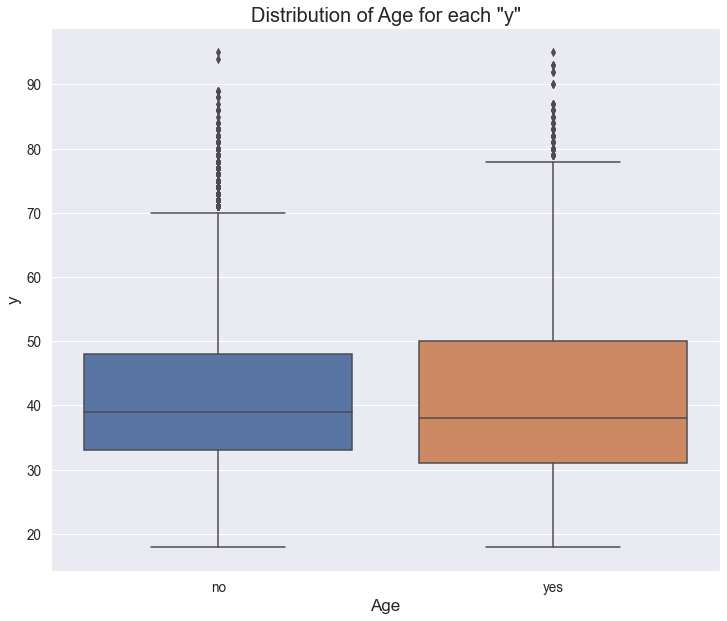

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.boxplot(x = 'y', y = 'age', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Age for each "y"', size = 20)
ax.set_xlabel('Age', size = 17)
ax.set_ylabel('y', size = 17)

Text(0.5, 0, 'Age')

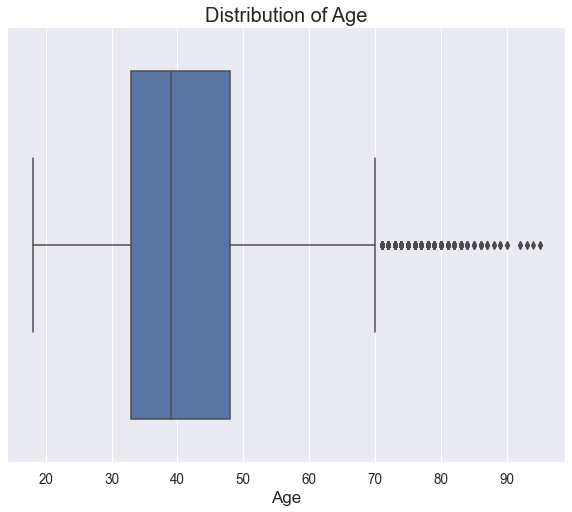

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'age', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Age', size = 20)
ax.set_xlabel('Age', size = 17)

Text(0.5, 0, 'Balance')

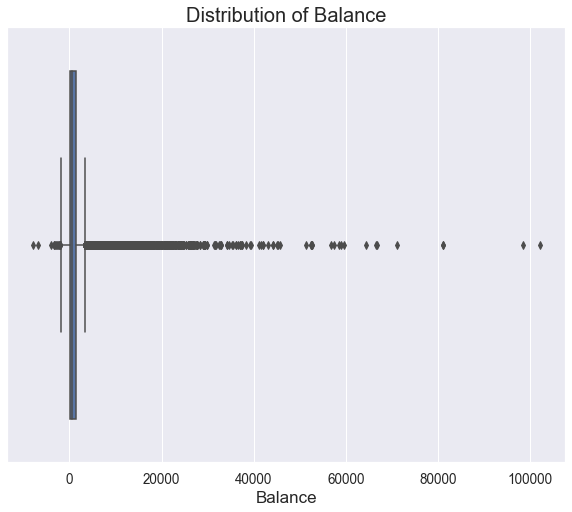

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'balance', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Balance', size = 20)
ax.set_xlabel('Balance', size = 17)

Text(0.5, 0, 'Day')

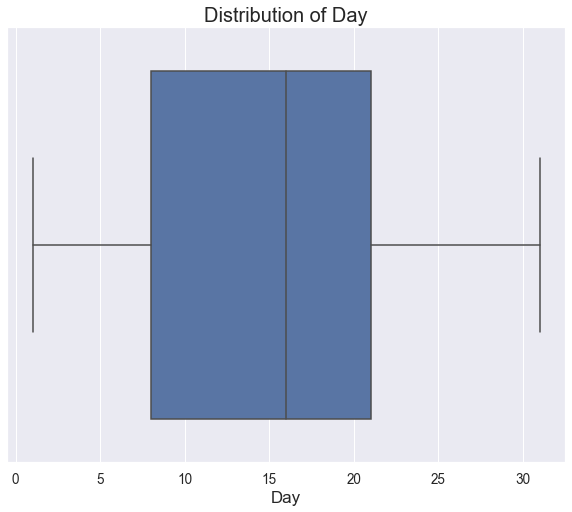

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'day', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Day', size = 20)
ax.set_xlabel('Day', size = 17)

Text(0.5, 0, 'Campaign')

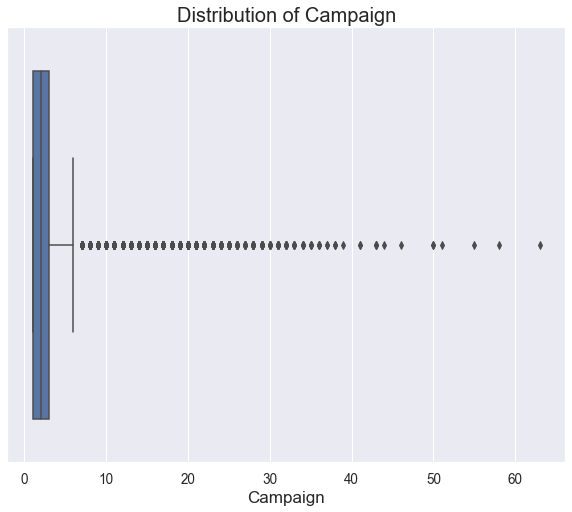

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'campaign', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Campaign', size = 20)
ax.set_xlabel('Campaign', size = 17)

Text(0.5, 0, 'Pdays')

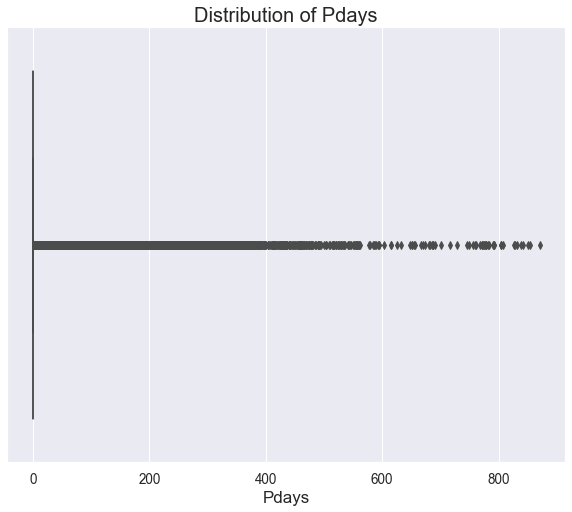

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'pdays', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Pdays', size = 20)
ax.set_xlabel('Pdays', size = 17)

Text(0.5, 0, 'Previous')

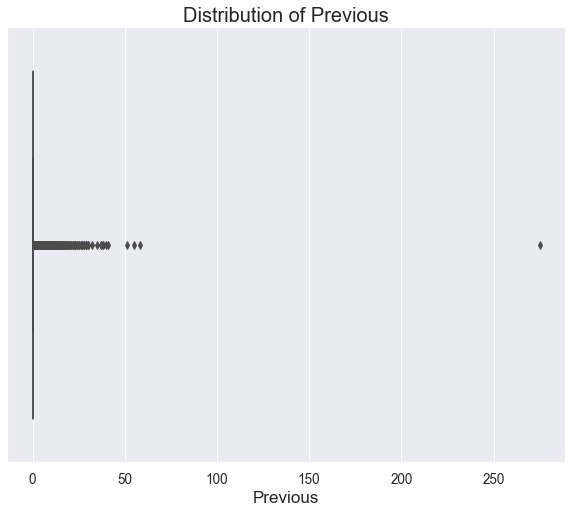

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x = 'previous', data = df)

ax.tick_params(axis = 'both', which = 'major', labelsize = 13.5)

ax.set_title('Distribution of Previous', size = 20)
ax.set_xlabel('Previous', size = 17)

## Takeaways from the above visualisations:

1. 'age' column: most of age value is distributed under 70 with median value in the high 30s
2. 'balance' column: balance varied widely, but most of the value was concentrated near 0
3. 'pdays' column: number of days passed since the last marketing campaign seem to be around 0
4. 'previous' column: mostly zero contacts were made previous to this marketing campaign

In [30]:
# Convert yes/no to binary variables (1,0) 
binary_col = ['default', 'housing', 'loan', 'y']
dict = {'yes':1, 'no':0}

for col in binary_col:
    binary = df[col].map(dict)
    df[col] = binary

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,-1,0,unknown,0


#### Evaluating the conversion rate of different segments that can be generated

In [31]:
def groupby_deposit(col_list):
    """Function to segment and calculate proportion of y = 1"""
    return df.groupby(col_list)['y'].mean()

def one_col_conv_rate(col):
    """Funciton to plot conversion rate of attribute segments"""
    data = groupby_deposit(col).to_frame().reset_index()
    plt.figure(figsize = (14,6))
    ax = sns.barplot(x = data['y'],\
                     y = data[col].astype('category'),\
                     ci = 95, edgecolor = 'black')
    
    ax.yaxis.grid(True)
    plt.title('Conversion rates for "{}" attribute client segments'.format(col))
    plt.xlabel('Marketing campaign conversion rate (1=100%)')   
    plt.xlim((0,1))

def two_col_conv_rate(col_list):
    """Function to plot conversion rate for 2-attribute segments"""
    data = groupby_deposit(col_list).to_frame().reset_index()
    plt.figure(figsize = (14,6))
    ax = sns.pointplot(x = data['y'],\
                       y = data[col_list[0]].astype('category'),\
                       hue = data[col_list[1]].astype('category'),\
                       join=False)
    
    ax.yaxis.grid(True)
    plt.title('Conversion rates for {}-{} client segments'.format(col_list[0], col_list[1]))
    plt.xlabel('Marketing campaign conversion rate (1=100%)')
    plt.xlim((0,1))

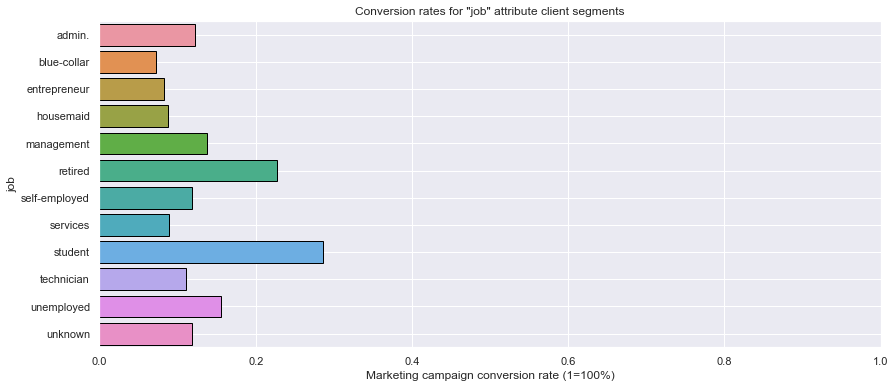

In [32]:
# Job
one_col_conv_rate('job')

### Takeaways:

1. Retired and Student clients have the highest conversion rate
2. Clients with Blue-collar, enterpreneur, services and housemade occupations have the lowest conversion rate 

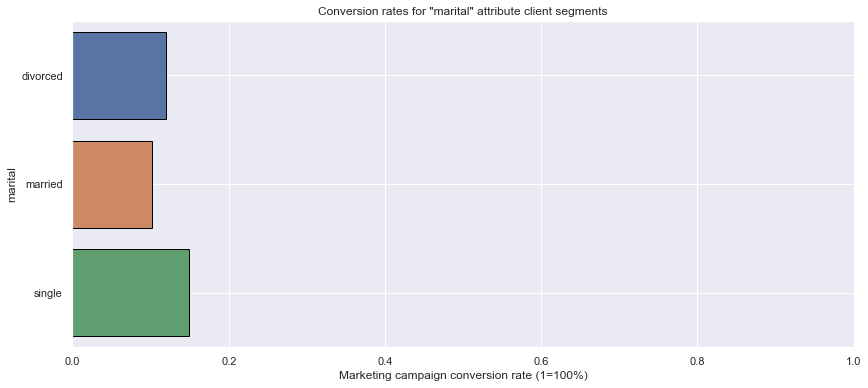

In [33]:
# Marital
one_col_conv_rate('marital')

### Takeaways:

1. Married clients are less likely to open a deposit 

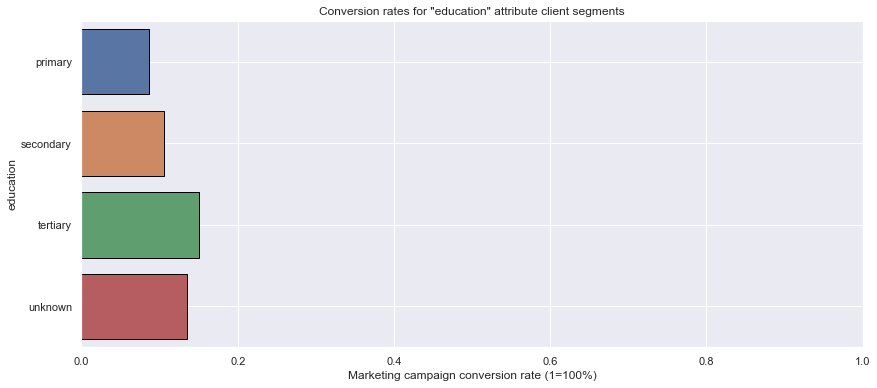

In [34]:
# Education`
one_col_conv_rate('education')

### Takeaways:

1. Higher the level of education, greater the likelihood of conversion was

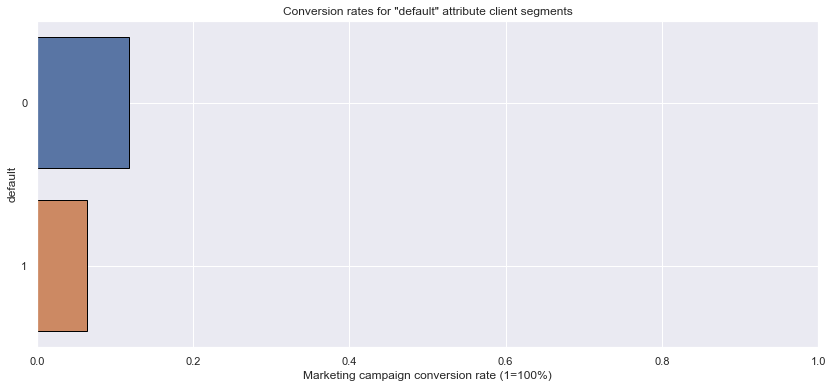

In [35]:
# Default
one_col_conv_rate('default')

### Takeaways:

1. Those with default experiences are less likely to have money in hand

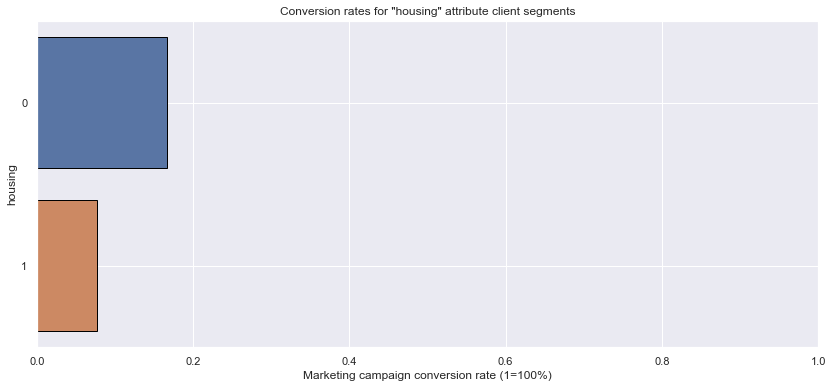

In [36]:
# housing
one_col_conv_rate('housing')

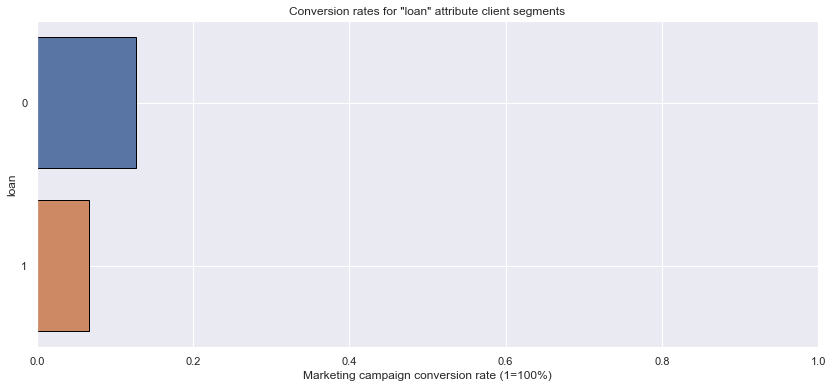

In [37]:
# loan
one_col_conv_rate('loan')

### Takeaways:

1. Those with any kind of loans have a lower conversion rate as they are less likely to have cash they are comfortable locking up over a period of time

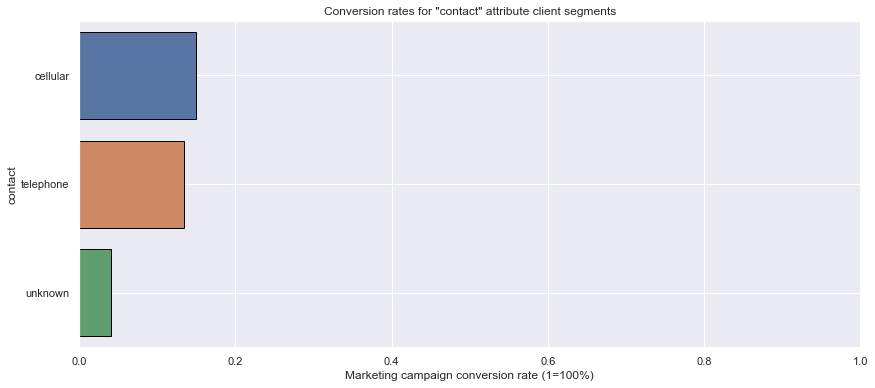

In [38]:
# contact
one_col_conv_rate('contact')

In [39]:
# Validate whether 'celluar' and 'telephone' contact method have different conversion rate
df1 = df[df['contact'] == 'cellular']['y']
df2 = df[df['contact'] == 'telephone']['y']
pval = ttest_ind(df1, df2).pvalue

print('Chance of "cellular" and "telephone" having a same value: {}%'.format(round(pval*100, 4)))

Chance of "cellular" and "telephone" having a same value: 2.9963%


### Takeaways:

1. Clients contacted through 'cellular' phones have a higher chance of conversion than those contacted through 'telephone'

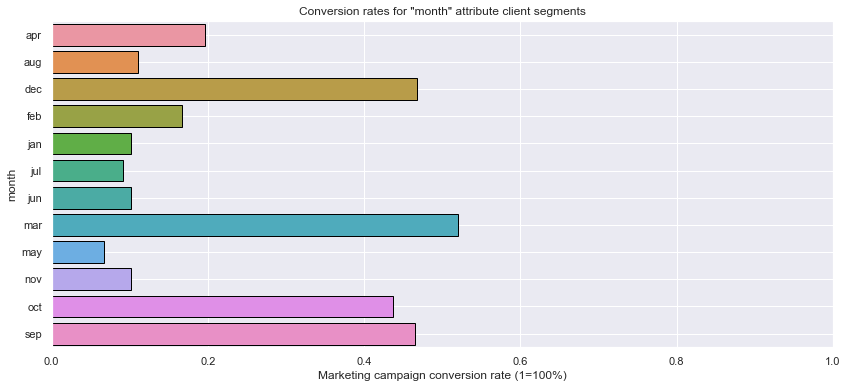

In [40]:
# month
one_col_conv_rate('month')

### Takeaways:

1. As there are many seasonal industries, this may be a reason for the varied conversion rates throughout the year
2. The months of December, March, October and September have a higher conversion rate than other months

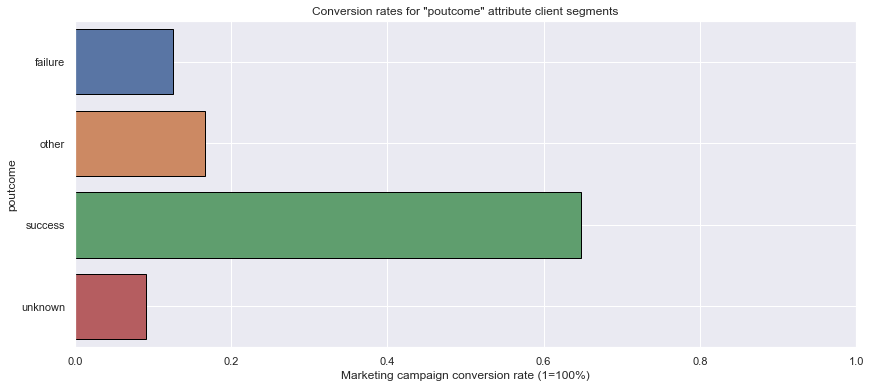

In [41]:
# poutcome
one_col_conv_rate('poutcome')

In [42]:
# Validate whether past failure/success of marketing campaign results in statistically significant difference in ongoing marketing campaign conversion rate
poutcome_failure = df[df['poutcome'] == 'failure']['y']
poutcome_success = df[df['poutcome'] == 'success']['y']
pval = ttest_ind(poutcome_failure, poutcome_success).pvalue

print('Chance of "failure" and "success" having a same value: {}%'.format(round(pval*100, 4)))

Chance of "failure" and "success" having a same value: 0.0%


### Takeaways:

1. Previous sucess in marketing campaign results in higher conversion rate that is statistically significant enough

<AxesSubplot:>

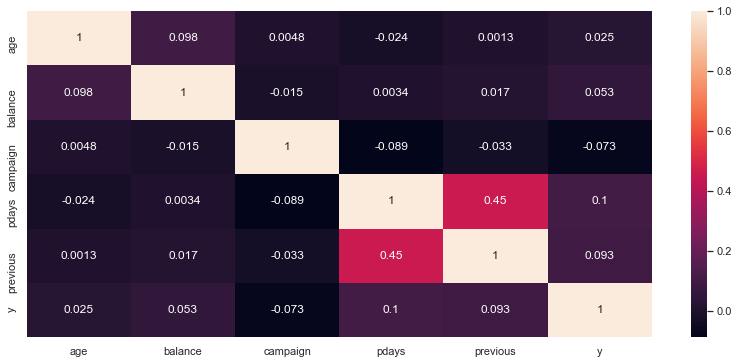

In [43]:
df_num = df[['age', 'balance', 'campaign', 'pdays', 'previous', 'y']]
plt.figure(figsize=(14,6))
sns.heatmap(df_num.corr(), annot=True)

### Takeaways:

1. Campaign(number of contacts performed during this campaign) and y have mild, negative correlation

2. pdays(number of days that passed since last contact in previous campaign) and previous(number of contacts performed before this campaign)<br> are strongly correlated as they both pertain to previous campaign experience

In [44]:
def plot_ecdf(data, col):
    """Function to plot empiricial cumulative distribution function"""
    x = np.sort(data[col])
    y = np.sort(np.arange(1, len(data[col])+1)/(len(data[col])+1))
    x_norm = np.sort(np.random.normal(data[col].mean(), data[col].std(), len(data[col])))

    plt.figure(figsize = (16,8))
    ax = sns.scatterplot(x = x, y = y, label = col, edgecolors = None, 
                         linewidth = 0, alpha = 0.5)
    sns.scatterplot(x = x_norm, y = y, label = 'Normal Distribution', 
                    ax = ax, edgecolors = None, linewidth = 0, 
                    alpha = 0.5, color = 'red')
    
    plt.title('ECDF of {}'.format(col))
    plt.ylabel('Probability')

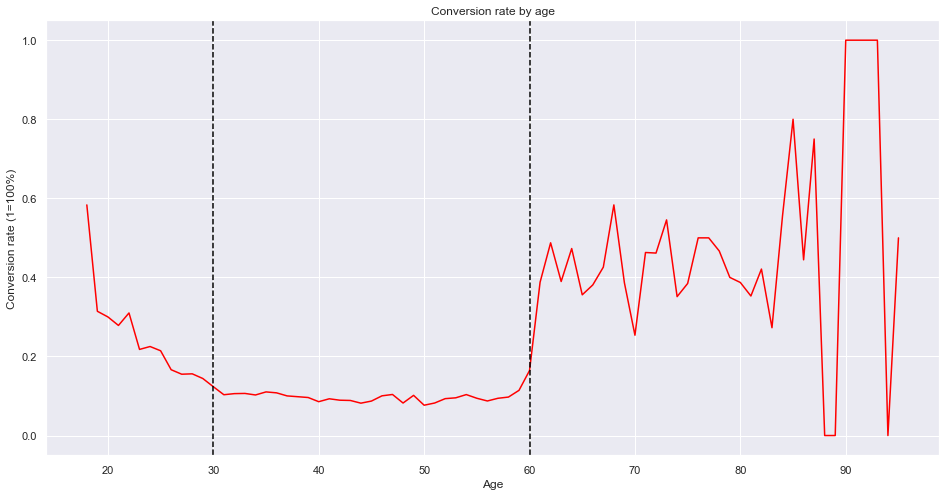

In [45]:
# Age column 
# this is too-micro, and  but it is to help us where the inflection points are
yearly_conv_rate = df.groupby('age')['y'].mean().to_frame().reset_index() # conversion rate by age
plt.figure(figsize=(16,8))
ax = sns.lineplot(x = 'age', y = 'y', data = yearly_conv_rate,
                  color = 'red')

plt.title('Conversion rate by age')
plt.xlabel('Age')
plt.ylabel('Conversion rate (1=100%)')

ax.axvline(30, linestyle = '--', color = 'black')
ax.axvline(60, linestyle = '--', color = 'black')

### Takeaways:

1. People belonging in the 30-60 age group, are less likely to open an account because:

> They have a more volatile expenditure. They tend to spend more of their money in more risky markets

> They may have EMIs to pay

In [46]:
# Create age grouping at 30 and 60
df.loc[:, 'age_group'] = '<30'
df.loc[(df['age'] >= 30)&(df['age'] < 60), 'age_group'] = '30-60'
df.loc[(df['age'] >= 60),'age_group'] = '>60'

In [47]:
# Count the number of clients in each of age_groups
df.value_counts('age_group')

age_group
30-60    38154
<30       5273
>60       1784
dtype: int64

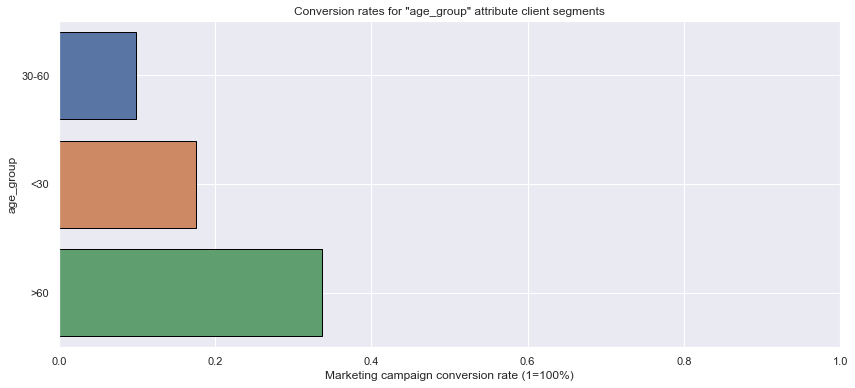

In [48]:
# See the conversion rate by age_group
one_col_conv_rate('age_group')

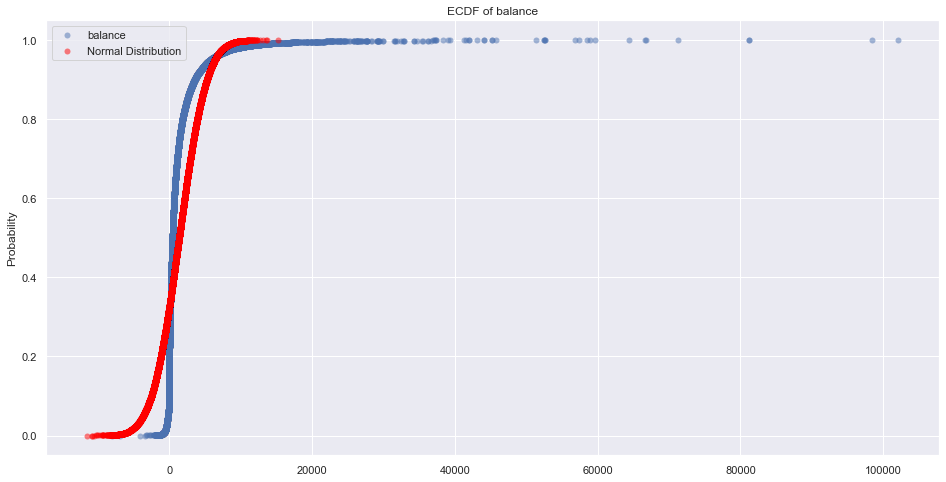

In [49]:
# Balance
plot_ecdf(df, 'balance')

In [50]:
# Create numeric groupings for balance
df.loc[:,'balance_group'] = '<0'
df.loc[(df['balance'] >= 0)&(df['balance'] < 1000), 'balance_group'] = '0-1000'
df.loc[(df['balance'] >= 1000)&(df['balance'] < 2500), 'balance_group'] = '1000-2500'
df.loc[(df['balance'] >= 2500), 'balance_group'] = '2500+'

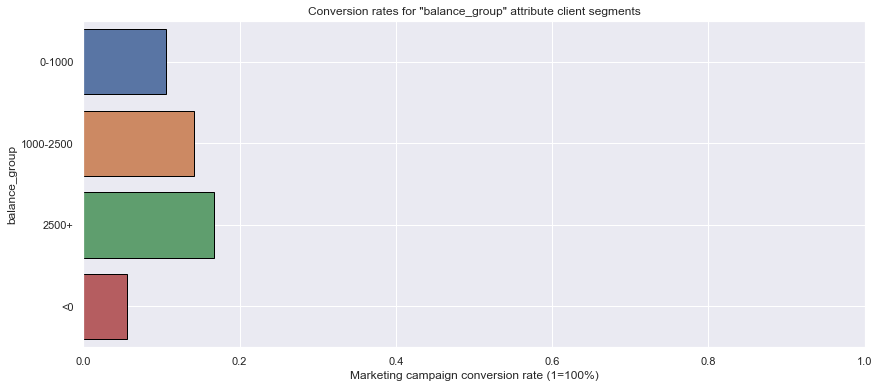

In [51]:
# visualize conversion rate
one_col_conv_rate('balance_group')

In [52]:
# validate that there is enough sample for each groupings
df.value_counts('balance_group').to_frame().sort_values('balance_group')

,0
balance_group,
0-1000,26803
1000-2500,7765
2500+,6877
<0,3766


### Takeaways:

1. The more money the client has in balance (Deposit Amount), greater is the chance of conversion

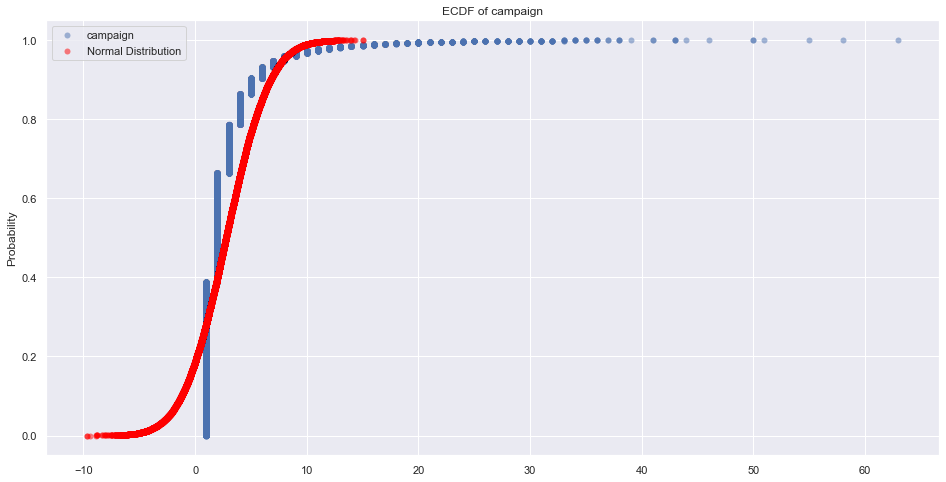

In [53]:
# Balance
plot_ecdf(df, 'campaign')

### Takeaways:

1. Most of the people were contacted either 1, 2 or 3 times. 
2. A smaller subset of people were contacted a higher number of times

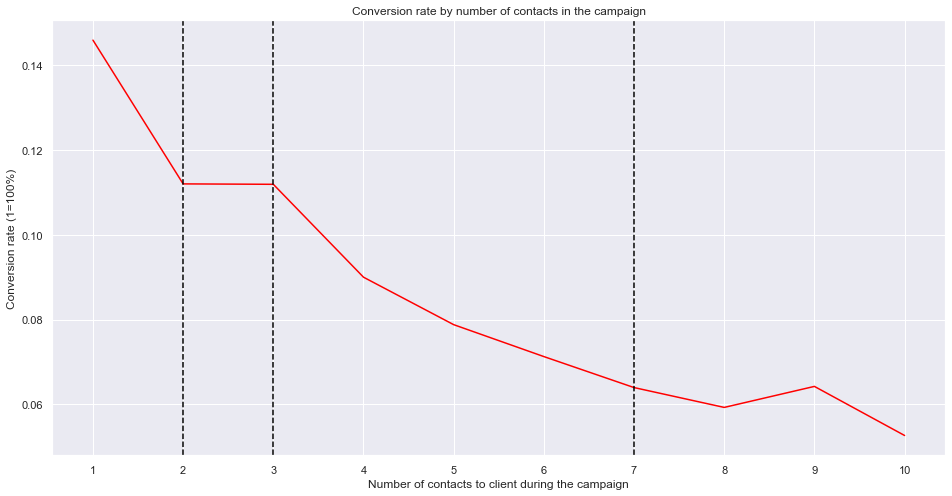

In [54]:
# Conversion rate by number of contacts in campaign
df_campaign = df[df['campaign'] <= 10]
campaign_conv_rate = df_campaign.groupby('campaign')['y'].mean().to_frame().reset_index() # conversion rate by campaign
plt.figure(figsize = (16,8))

ax = sns.lineplot(x = 'campaign', y = 'y', data = campaign_conv_rate, color = 'red')

plt.title('Conversion rate by number of contacts in the campaign')
plt.xlabel('Number of contacts to client during the campaign')
plt.ylabel('Conversion rate (1=100%)')

plt.xticks(np.arange(1, 11))

ax.axvline(2, linestyle = '--', color = 'black')
ax.axvline(3, linestyle = '--', color = 'black')
ax.axvline(7, linestyle = '--', color = 'black')

## Takeaways:

1. The conversion rate decreases after each subsequent contacts
2. There is a huge dip in the conversion rate after the 3rd call/contact
3. The conversion rate decreases even more after the 7th call, but this may be due to a relatively lower sample size

In [55]:
# assign categorical data for grouping contacts during campaign
df.loc[:,'campaign_group'] = ''
df.loc[df['campaign'] == 1, 'campaign_group'] = '1'
df.loc[(df['campaign'] == 2) | (df['campaign'] == 3), 'campaign_group'] = '2-3'
df.loc[(df['campaign'] > 3) & (df['campaign'] <= 7), 'campaign_group'] = '4-7'
df.loc[(df['campaign'] > 7), 'campaign_group'] = '7+'

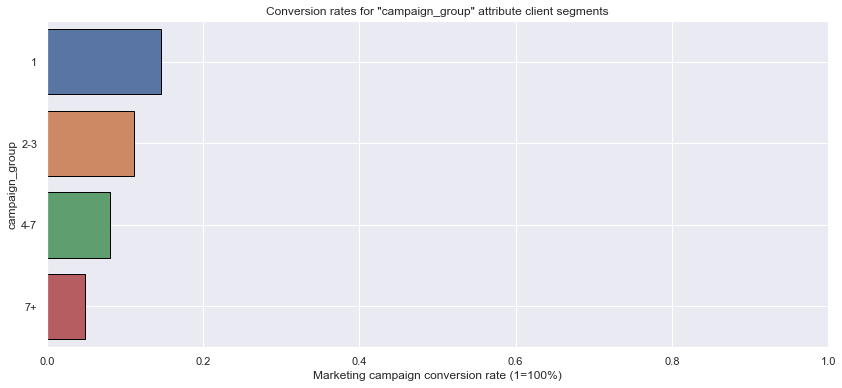

In [56]:
# plot conversion rate by groups
one_col_conv_rate('campaign_group')

In [57]:
# validate diminishing conversion rate by number of calls
camp_1 = df[df['campaign'] == 1]
camp_23 = df[(df['campaign'] == 2)|(df['campaign'] == 3)]
pval = ttest_ind(camp_1['y'], camp_23['y']).pvalue

print('Chance of campaign = 1 and campaign = (2 or 3) having a same converion rate: {}%'.format(round(pval*100, 4)))

Chance of campaign = 1 and campaign = (2 or 3) having a same converion rate: 0.0%


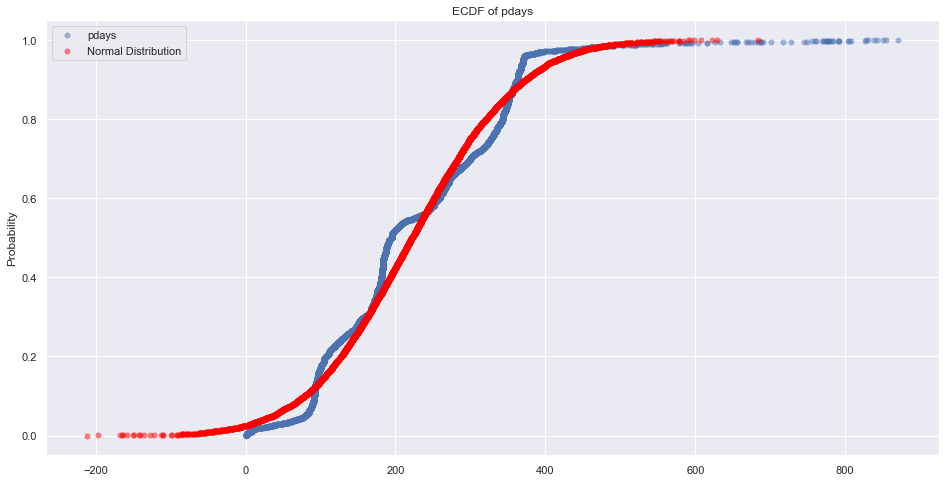

In [58]:
# exclude -1
plot_ecdf(df[df['pdays'] >= 0], 'pdays')

### Takeaways:

1. The distribution of days passed since the client was last contacted is not normal. <br>This suggests that there were a bulk of clients that were contacted in the previous market campaign with rests in between 

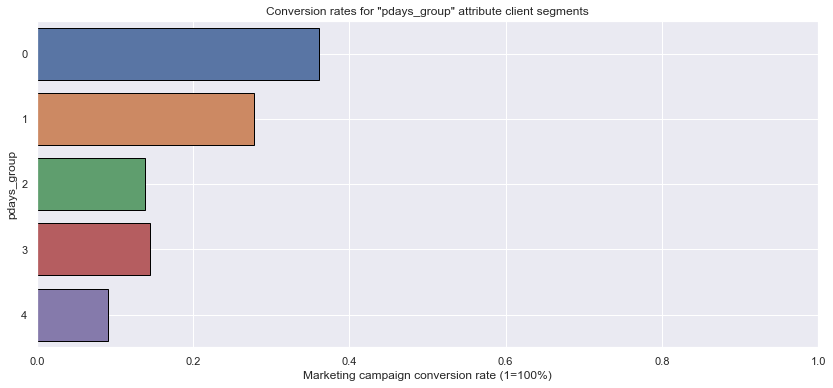

In [59]:
# label pdays into groups
df.loc[:,'pdays_group'] = 4 
df.loc[~(df['pdays']== -1),'pdays_group'] = pd.qcut(df.loc[~(df['pdays'] == -1), 'pdays'], 4, labels=False)
one_col_conv_rate('pdays_group')

### Label descripion:

1. 0 : 1st quartile in days passed since last marketing campaign contact
2. 1 : 2nd quartile in days passed since last marketing campaign contact
3. 2 : 3rd quartile in days passed since last marketing campaign contact
4. 3 : 4th quartile in days passed since last marketing campaign contact
5. 4 : No previous marketing campaign

### Takeaway:

1. Those who have not been previously contacted have the lowest conversion rate
2. Longer you wait to connect since the last campaign, the lower the marketing campaign conversion rate

In [60]:
# validate sufficient count per group
df['pdays_group'].value_counts()

4    36954
0     2084
2     2068
3     2060
1     2045
Name: pdays_group, dtype: int64

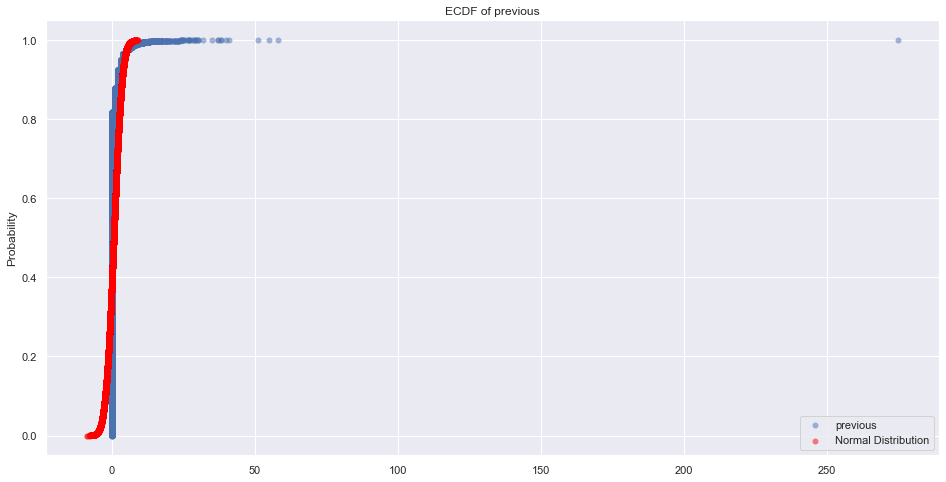

In [61]:
# plot 'previous'
plot_ecdf(df, 'previous')

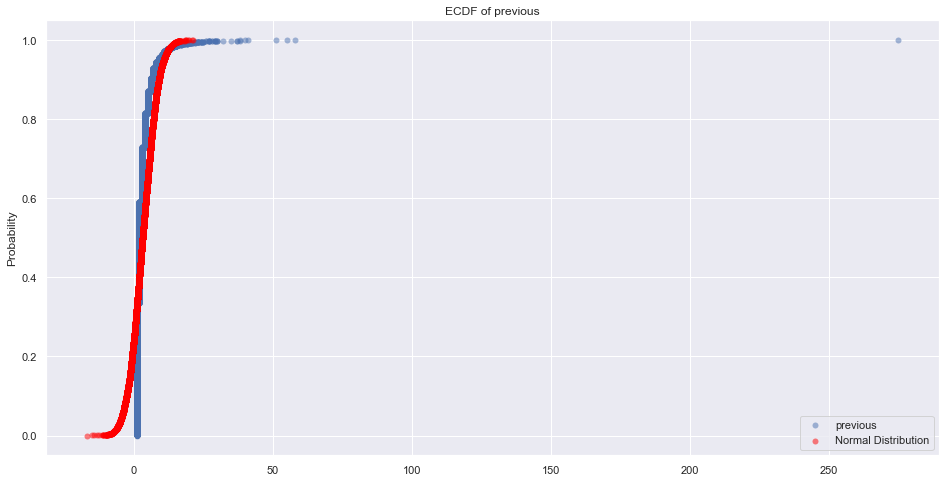

In [62]:
plot_ecdf(df[df['previous'] > 0], 'previous')

### Takeaway:

1. Most of the clients were not contacted in the past

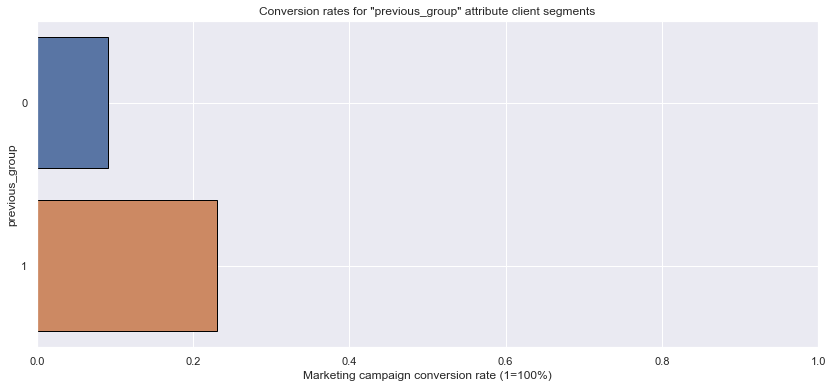

In [63]:
# Convert previous into binary variable
df.loc[:, 'previous_group'] = df.loc[:, 'previous']
df.loc[df['previous_group']>0, 'previous_group'] = 1
one_col_conv_rate('previous_group')

### Takeaway:

1. Clients who have been previously contacted have a much higher conversion rate

In [64]:
# Count number of samples per column's unique value
df.value_counts('previous_group')

previous_group
0    36954
1     8257
dtype: int64

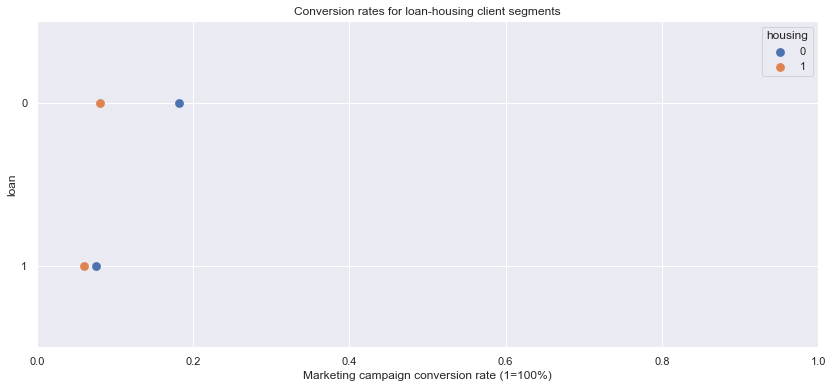

In [65]:
# loan and housing
col_list = ['loan','housing']
two_col_conv_rate(col_list)

### Takeaway:

1. If a client has a housing loan, an additional loan does not impact the conversion rate negatively 

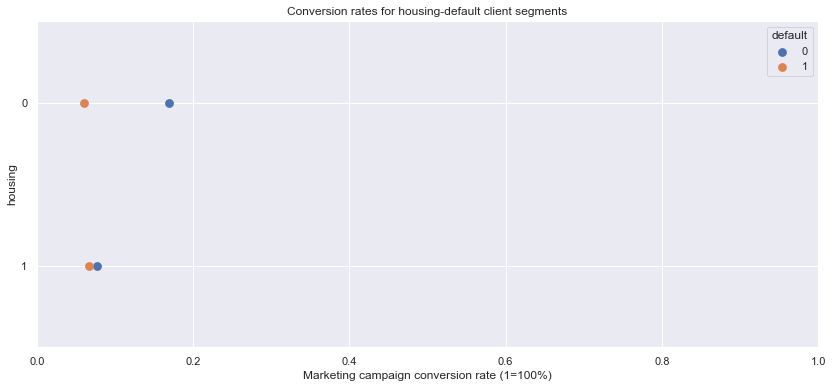

In [66]:
col_list = ['housing','default']
two_col_conv_rate(col_list)

### Takeaway:

1. Clients with a housing loan have a similar chance of conversion even with default histories

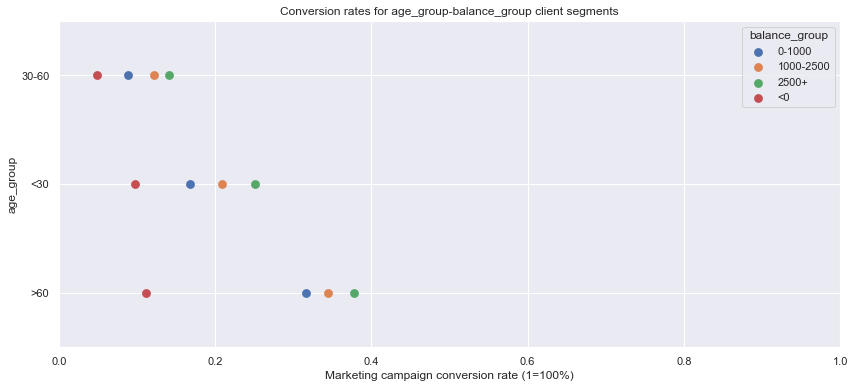

In [67]:
# age - balance
col_list = ['age_group','balance_group']
two_col_conv_rate(col_list)

### Takeaway:

1. An older client (60+ years) with a subzero balance is less likely to open a deposit at the bank, compared to people in the same age group

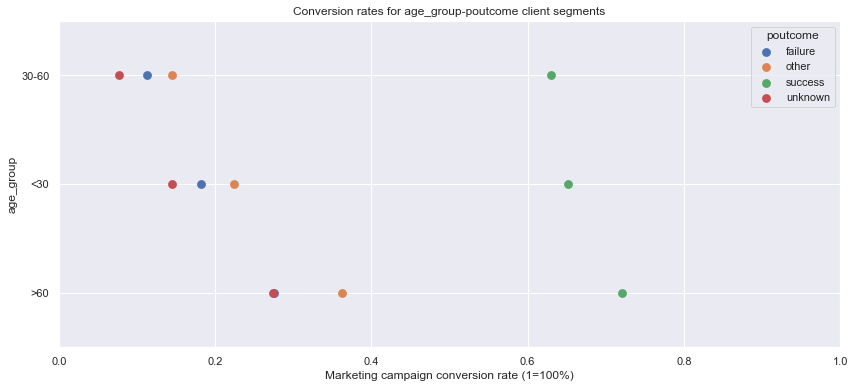

In [68]:
# age - poutcome
col_list = ['age_group','poutcome']
two_col_conv_rate(col_list)

### Takeaways:

1. Previous conversion in previous campaign meant 65%+ conversion acorss age groups

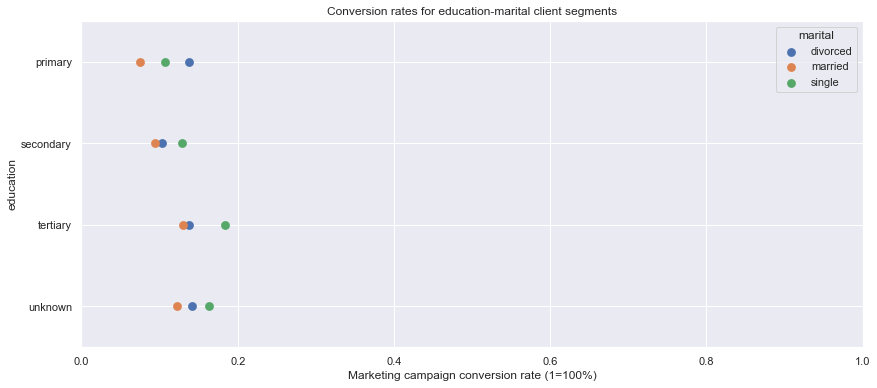

In [69]:
# education - marital
col_list = ['education','marital']
two_col_conv_rate(col_list)

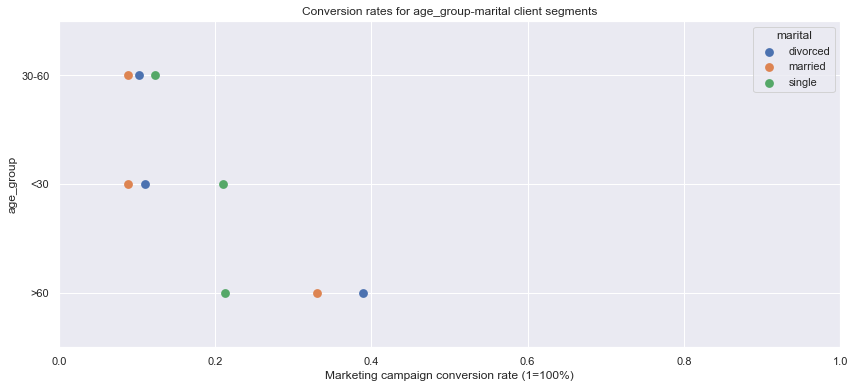

In [70]:
# age_group - marital
col_list = ['age_group','marital']
two_col_conv_rate(col_list)

### Takeaway:

1. Across 30-60 and <30 age groups, single clients have the highest chance of conversion.<br>This trend is not followed in the 60+ age group

## Feature Engineering:

1. Interaction term between loan and housing
2. Interaction term between housing and default
3. Interaction term between age_group == '>60' and balance_group == '<0'

In [71]:
#Interaction term between loan and housing
df['loan*housing'] = 0
df.loc[(df['loan']==1)&(df['housing']==1), 'loan*housing'] = 1

#Interaction term between housing and default
df['default*housing'] = 0
df.loc[(df['default']==1)&(df['housing']==1), 'default*housing'] = 1

#Interaction term between age_group=='>60' and balance_group=='<0'
df['age>60*balance<0'] = 0
df.loc[(df['age_group']=='>60')&(df['balance_group']=='<0'), 'age>60*balance<0'] = 1

In [72]:
#Columns to use
columns_required = ['age_group', 'job', 'marital', 'education', 'default',\
                    'balance_group', 'housing', 'loan','contact', 'month', \
                    'campaign_group', 'pdays_group', 'previous_group', 'poutcome', 'y',\
                    'loan*housing', 'default*housing', 'age>60*balance<0']

#Subsetting the required columns
data = df[columns_required]

cat_cols = ['age_group', 'job', 'marital', 'education',
            'balance_group','contact', 'month', \
            'campaign_group', 'pdays_group', 'previous_group', 'poutcome']

data = pd.get_dummies(data, columns = cat_cols, drop_first=False)

data.head(10)

,default,housing,loan,y,loan*housing,default*housing,age>60*balance<0,age_group_30-60,age_group_<30,age_group_>60,...,pdays_group_1,pdays_group_2,pdays_group_3,pdays_group_4,previous_group_0,previous_group_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
6,0,1,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
7,1,1,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
